<a href="https://colab.research.google.com/github/pennya6/AI_study/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5/%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

회귀

In [6]:
import numpy as np

In [7]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )

In [8]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [2]:
import matplotlib.pyplot as plt


In [12]:
#데이터 모양
#56개의 데이터 -> 1차원 배열
perch_length.shape

(56,)

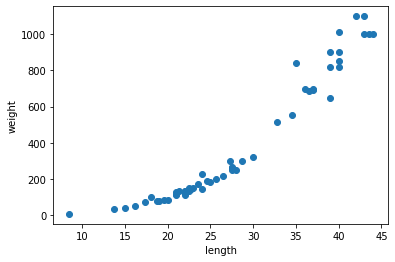

In [9]:
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

훈련세트 준비

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_input,test_input,train_target,test_target=train_test_split(perch_length,perch_weight,random_state=42)

In [13]:
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)

회귀모델훈련

In [14]:
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor()
knr.fit(train_input,train_target)

knr.score(test_input,test_target)

0.9928094061010639

In [15]:
from sklearn.metrics import mean_absolute_error

test_prediction=knr.predict(test_input)
mae=mean_absolute_error(test_target,test_prediction)
print(mae)

19.157142857142862


=> 과대적합 과소적합

In [16]:
knr.score(train_input,train_target)

0.9698823289099255

In [17]:
knr.score(test_input,test_target)

0.9928094061010639

이웃 개수 줄이기

In [29]:
knr.n_neighbors=3
knr.fit(train_input,train_target)
print(knr.score(train_input,train_target))

0.9804899950518966


In [21]:
knr.score(test_input,test_target)

0.974645996398761

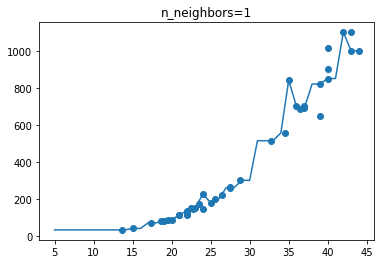

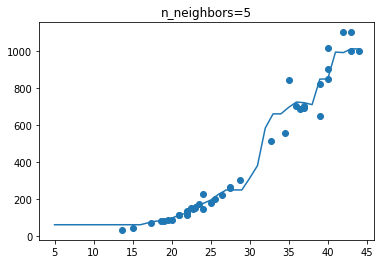

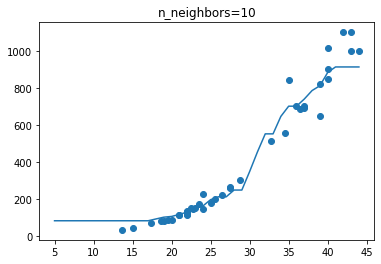

In [25]:
knr=KNeighborsRegressor()

#5에서 45까지 배열을 만들어 준다.
x=np.arange(5,45).reshape(-1,1)

for n in [1,5,10]:
  knr.n_neighbors=n
  knr.fit(train_input,train_target)
  prediction=knr.predict(x)
  plt.scatter(train_input,train_target)
  plt.plot(x,prediction)
  plt.title('n_neighbors={}'.format(n))
  plt.show()

선형회귀

In [30]:
print(knr.predict([[50]]))

[1033.33333333]


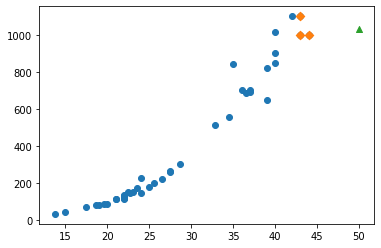

In [31]:
distances,indexes=knr.kneighbors([[50]])

plt.scatter(train_input,train_target)
plt.scatter(train_input[indexes],train_target[indexes],marker='D')

plt.scatter(50,1033,marker="^")
plt.show()

In [38]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(train_input,train_target)

#50 예측
print(lr.predict([[50]]))
print(lr.coef_,lr.intercept_)

[1241.83860323]
[39.01714496] -709.0186449535477


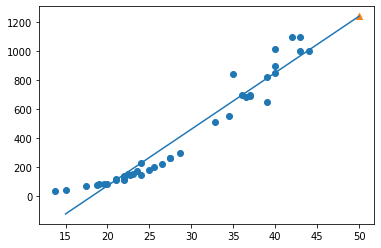

In [34]:
plt.scatter(train_input,train_target)

//15-50까지 1차 방정식 그리기
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])

//예측한 50 그리기
plt.scatter(50,1241.8,marker='^')
plt.show()

In [35]:
lr.score(train_input,train_target)

0.9398463339976039

In [36]:
lr.score(test_input,test_target)

0.8247503123313558

다항회귀(polunominal)  
다차항을 고려하자

In [39]:
train_poly=np.column_stack((train_input**2,train_input))
test_poly=np.column_stack((test_input**2,test_input))

In [40]:
lr=LinearRegression()
lr.fit(train_poly,train_target)

print(lr.predict([[50**2,50]]))

print(lr.coef_,lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278276


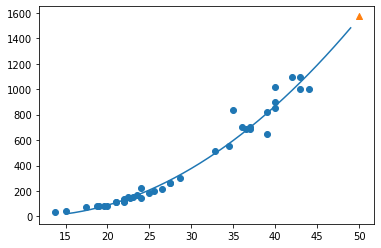

In [41]:
point=np.arange(15,50)

plt.scatter(train_input,train_target)

plt.plot(point,1.01*point**2-21.6*point+116.05)

plt.scatter([50],[1574],marker='^')
plt.show()

In [42]:
lr.score(train_poly,train_target)

0.9706807451768623

In [43]:
lr.score(test_poly,test_target)

0.9775935108325122